In [0]:
QUESTION 1

In [0]:
Step 1. Import the necessary libraries

In [1]:
import pandas as pd

In [0]:
Step 2. Import the dataset from this address.
Step 3. Assign it to a variable called users

In [2]:
users = pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user", sep = "|")
users

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


In [0]:
Step 4. Discover what is the mean age per occupation

In [3]:
users.groupby("occupation").age.mean()

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

In [0]:
Step 5. Discover the Male ratio per occupation and sort it from the most to the least

In [4]:
users.rename(columns={"sex":"gender"}, inplace=True)

In [5]:
gender_counts = users.groupby("occupation")["gender"].value_counts(normalize=True)*100
gender_counts.head()

occupation     gender
administrator  M          54.430380
               F          45.569620
artist         M          53.571429
               F          46.428571
doctor         M         100.000000
Name: proportion, dtype: float64

In [6]:
gender_percent = pd.DataFrame(gender_counts)
gender_percent.rename(columns={"gender":"percent"}, inplace=True)
gender_percent.head()

proportion
occupation    gender            
administrator M        54.430380
              F        45.569620
artist        M        53.571429
              F        46.428571
doctor        M       100.000000

In [7]:
new_gen = pd.DataFrame(gender_percent.reset_index(level=["occupation", "gender"]))
new_gen.head()

,occupation,gender,proportion
0,administrator,M,54.430380
1,administrator,F,45.569620
2,artist,M,53.571429
3,artist,F,46.428571
4,doctor,M,100.000000


In [8]:
males = new_gen[new_gen["gender"] == "M"].sort_values(by="proportion",ascending=False)
males

,occupation,gender,proportion
4,doctor,M,100.000000
7,engineer,M,97.014925
37,technician,M,96.296296
29,retired,M,92.857143
27,programmer,M,90.909091
11,executive,M,90.625000
33,scientist,M,90.322581
9,entertainment,M,88.888889
17,lawyer,M,83.333333
31,salesman,M,75.000000


In [0]:
Step 6. For each occupation, calculate the minimum and maximum ages

In [9]:
users.groupby("occupation").age.agg([min, max])

,min,max
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


In [0]:
Step 7. For each combination of occupation and sex, calculate the mean age

In [10]:
users.groupby(["occupation", "gender"]).age.mean()

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

In [0]:
Step 8. For each occupation present the percentage of women and men

In [11]:
new_gen

,occupation,gender,proportion
0,administrator,M,54.430380
1,administrator,F,45.569620
2,artist,M,53.571429
3,artist,F,46.428571
4,doctor,M,100.000000
5,educator,M,72.631579
6,educator,F,27.368421
7,engineer,M,97.014925
8,engineer,F,2.985075
9,entertainment,M,88.888889


In [0]:
QUESTION 2

In [0]:
Step 1. Import the necessary libraries
Step 2. Import the dataset from this address
Step 3. Assign it to a variable called euro12

In [12]:
euro12 = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv', sep=',')
euro12

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


In [0]:
Step 4. Select only the Goal column

In [13]:
euro12.Goals

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

In [0]:
Step 5. How many team participated in the Euro2012?

In [14]:
euro12.shape[0]

16

In [0]:
Step 6. What is the number of columns in the dataset?

In [18]:
euro12.shape[1]

35

In [0]:
Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline

In [19]:
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


In [0]:
Step 8. Sort the teams by Red Cards, then to Yellow Cards

In [20]:
discipline.sort_values(['Red Cards', 'Yellow Cards'], ascending = False)

,Team,Yellow Cards,Red Cards
6,Greece,9,1
9,Poland,7,1
11,Republic of Ireland,6,1
7,Italy,16,0
10,Portugal,12,0
13,Spain,11,0
0,Croatia,9,0
1,Czech Republic,7,0
14,Sweden,7,0
4,France,6,0


In [0]:
Step 9. Calculate the mean Yellow Cards given per Team

In [21]:
round(discipline['Yellow Cards'].mean())

7

In [0]:
Step 10. Filter teams that scored more than 6 goalsStep

In [22]:
euro12[euro12.Goals > 6]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


In [0]:
11. Select the teams that start with G

In [25]:
euro12[euro12.Team.str.startswith('G')]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


In [0]:
Step 12. Select the first 7 columns

In [23]:
euro12.iloc[: , 0:7]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


In [0]:
13. Select all columns except the last 3

In [24]:
euro12.iloc[: , :-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


In [0]:
Step 14. Present only the Shooting Accuracy from England, Italy and Russia

In [26]:
euro12.loc[euro12.Team.isin(['England', 'Italy', 'Russia']), ['Team','Shooting Accuracy']]

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


In [0]:
Question 3

In [0]:
Step 1. Import the necessary libraries
Step 2. Create 3 differents Series, each of length 100, as follows:
• The first a random number from 1 to 4
• The second a random number from 1 to 3
• The third a random number from 10,000 to 30,000

In [27]:
import numpy as np
s1 = pd.Series(np.random.randint(1, high=5, size=100, dtype='l'))
s2 = pd.Series(np.random.randint(1, high=4, size=100, dtype='l'))
s3 = pd.Series(np.random.randint(10000, high=30001, size=100, dtype='l'))

print(s1, s2, s3)

0     4
1     1
2     1
3     2
4     2
     ..
95    1
96    1
97    4
98    2
99    4
Length: 100, dtype: int64 0     1
1     3
2     3
3     2
4     3
     ..
95    2
96    2
97    3
98    3
99    2
Length: 100, dtype: int64 0     16212
1     26003
2     16201
3     12973
4     24761
      ...  
95    20591
96    11088
97    27210
98    22668
99    20781
Length: 100, dtype: int64


In [0]:
Step 3. Create a DataFrame by joinning the Series by column
Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter

In [28]:
df = pd.concat([s1, s2, s3], axis=1)
df.head()

,0,1,2
0,4,1,16212
1,1,3,26003
2,1,3,16201
3,2,2,12973
4,2,3,24761


In [0]:
Step 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'

In [29]:
bigcolumn = pd.concat([s1, s2, s3], axis=0)

bigcolumn = bigcolumn.to_frame()
print(type(bigcolumn))

bigcolumn

<class 'pandas.core.frame.DataFrame'>


,0
0,4
1,1
2,1
3,2
4,2
...,...
95,20591
96,11088
97,27210
98,22668


In [0]:
Step 6. Ops it seems it is going only until index 99. Is it true?

In [0]:
Yes 

In [30]:
len(bigcolumn)

300

In [0]:
Step 7. Reindex the DataFrame so it goes from 0 to 299

In [31]:
bigcolumn.reset_index(drop=True, inplace=True)
bigcolumn

,0
0,4
1,1
2,1
3,2
4,2
...,...
295,20591
296,11088
297,27210
298,22668


In [0]:
QUESTION 4

In [0]:
Step 1. Import the necessary libraries
Step 2. Import the dataset from the attached file wind.txt
Step 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index.

In [32]:
import pandas as pd
import numpy as np


file_path = ""C:\Users\rahul\Downloads\wind.txt""
data = pd.read_table(file_path, sep='\s+', parse_dates=[[0, 1, 2]])
data

/var/folders/n4/pd0tgvhn10db5zyyyl3lfgsr0000gn/T/ipykernel_32493/1912464824.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_table(file_path, sep='\s+', parse_dates=[[0, 1, 2]])


,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,1978-12-30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


In [0]:
Step 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it.

In [34]:
def fix_year(date):
    if date.year > 1989:
        date = date.replace(year=date.year - 100)
    return date


data['Date'] = data['Yr_Mo_Dy'].apply(fix_year)


data.set_index('Date', inplace=True)
data.drop(['Yr_Mo_Dy'], axis=1, inplace=True)

data

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58


In [0]:
Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].

In [35]:
data.index.name = 'Date'

In [36]:
data

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58


In [0]:
Step 6. Compute how many values are missing for each location over the entire record.They should be ignored in all calculations below.

In [39]:
data.shape[0] - data.isnull().sum()

data.notnull().sum()

RPT    6568
VAL    6571
ROS    6572
KIL    6569
SHA    6572
BIR    6574
DUB    6571
CLA    6572
MUL    6571
CLO    6573
BEL    6574
MAL    6570
dtype: int64

In [0]:
Step 7. Compute how many non-missing values there are in total.

In [38]:
data.notnull().sum().sum()

78857

In [0]:
Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times.

In [40]:
data.sum().sum() / data.notna().sum().sum()

10.227883764282181

In [0]:
Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days

In [41]:
loc_stats = pd.DataFrame({
    'Min': data.min(),'Max': data.max(),
    'Mean': data.mean(),'Std': data.std()})
loc_stats

,Min,Max,Mean,Std
RPT,0.67,35.80,12.362987,5.618413
VAL,0.21,33.37,10.644314,5.267356
ROS,1.50,33.84,11.660526,5.008450
KIL,0.00,28.46,6.306468,3.605811
SHA,0.13,37.54,10.455834,4.936125
BIR,0.00,26.16,7.092254,3.968683
DUB,0.00,30.37,9.797343,4.977555
CLA,0.00,31.08,8.495053,4.499449
MUL,0.00,25.88,8.493590,4.166872
CLO,0.04,28.21,8.707332,4.503954


In [0]:
Step 10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day.

In [42]:
day_stats = pd.DataFrame()

day_stats['min'] = data.min(axis = 1)    #min
day_stats['max'] = data.max(axis = 1)    #max 
day_stats['mean'] = data.mean(axis = 1)  #mean
day_stats['std'] = data.std(axis = 1)    #standard deviations

day_stats.head()

,min,max,mean,std
Date,,,,
1961-01-01,9.29,18.50,13.018182,2.808875
1961-01-02,6.50,17.54,11.336364,3.188994
1961-01-03,6.17,18.50,11.641818,3.681912
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356


In [0]:
Step 11. Find the average windspeed in January for each location.

In [43]:
data.loc[data.index.month == 1].mean()

RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

In [0]:
Step 11. Find the average windspeed in January for each location.
Treat January 1961 and January 1962 both as January.
Step 12. Downsample the record to a yearly frequency for each location.
Step 13. Downsample the record to a monthly frequency for each location.
Step 14. Downsample the record to a weekly frequency for each location.
Step 15. Calculate the min, max and mean windspeeds and standard deviations of the

In [49]:
january_avg = data[data.index.month == 1].groupby(data[data.index.month == 1].index.year).mean()
january_avg

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961,14.841333,11.988333,13.431613,7.736774,11.072759,8.588065,11.184839,9.245333,9.085806,10.107419,13.880968,14.703226
1962,14.783871,13.160323,12.591935,7.538065,11.779677,8.720000,14.211935,9.600000,9.670000,11.498710,16.369355,15.661613
1963,14.868387,11.112903,15.121613,6.635806,11.080645,7.835484,12.797419,9.844839,7.841613,9.390000,11.428710,18.822258
1964,12.661290,11.818387,11.741290,6.953548,11.400645,6.865806,9.592903,9.687419,6.947742,9.676774,15.067419,14.145484
1965,15.741613,15.546774,15.274194,8.258387,13.588065,9.251290,13.850968,11.260000,9.899355,11.706129,16.196129,17.888710
1966,15.834839,13.283226,15.136452,8.659355,12.968065,9.163548,12.150000,10.475806,8.750645,10.739677,14.074516,15.554194
1967,13.736129,11.470968,11.537419,6.928065,10.833548,6.730323,9.787419,7.474839,7.627097,10.169032,13.457742,17.124516
1968,14.733226,12.829032,12.294194,7.849032,12.262581,7.133226,12.395806,9.225806,9.415484,9.255161,14.213871,19.095484
1969,12.824839,12.113871,11.403871,6.708710,10.557097,5.926452,9.882903,8.375161,8.378065,9.515484,13.410000,16.957742


In [50]:
data.groupby(data.index.to_period('Y')).mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961,12.299583,10.351796,11.362369,6.958227,10.881763,7.729726,9.733923,8.858788,8.647652,9.835577,13.502795,13.680773
1962,12.246923,10.110438,11.732712,6.960440,10.657918,7.393068,11.020712,8.793753,8.316822,9.676247,12.930685,14.323956
1963,12.813452,10.836986,12.541151,7.330055,11.724110,8.434712,11.075699,10.336548,8.903589,10.224438,13.638877,14.999014
1964,12.363661,10.920164,12.104372,6.787787,11.454481,7.570874,10.259153,9.467350,7.789016,10.207951,13.740546,14.910301
1965,12.451370,11.075534,11.848767,6.858466,11.024795,7.478110,10.618712,8.879918,7.907425,9.918082,12.964247,15.591644
1966,13.461973,11.557205,12.020630,7.345726,11.805041,7.793671,10.579808,8.835096,8.514438,9.768959,14.265836,16.307260
1967,12.737151,10.990986,11.739397,7.143425,11.630740,7.368164,10.652027,9.325616,8.645014,9.547425,14.774548,17.135945
1968,11.835628,10.468197,11.409754,6.477678,10.760765,6.067322,8.859180,8.255519,7.224945,7.832978,12.808634,15.017486
1969,11.166356,9.723699,10.902000,5.767973,9.873918,6.189973,8.564493,7.711397,7.924521,7.754384,12.621233,15.762904


In [45]:
data.groupby(data.index.to_period('M')).mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01,14.841333,11.988333,13.431613,7.736774,11.072759,8.588065,11.184839,9.245333,9.085806,10.107419,13.880968,14.703226
1961-02,16.269286,14.975357,14.441481,9.230741,13.852143,10.937500,11.890714,11.846071,11.821429,12.714286,18.583214,15.411786
1961-03,10.890000,11.296452,10.752903,7.284000,10.509355,8.866774,9.644194,9.829677,10.294138,11.251935,16.410968,15.720000
1961-04,10.722667,9.427667,9.998000,5.830667,8.435000,6.495000,6.925333,7.094667,7.342333,7.237000,11.147333,10.278333
1961-05,9.860968,8.850000,10.818065,5.905333,9.490323,6.574839,7.604000,8.177097,8.039355,8.499355,11.900323,12.011613
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08,9.645161,8.259355,9.032258,4.502903,7.368065,5.935161,5.650323,5.417742,7.241290,5.536774,10.466774,12.054194
1978-09,10.913667,10.895000,10.635000,5.725000,10.372000,9.278333,10.790333,9.583000,10.069333,8.939000,15.680333,19.391333
1978-10,9.897742,8.670968,9.295806,4.721290,8.525161,6.774194,8.115484,7.337742,8.297742,8.243871,13.776774,17.150000


In [46]:
data.groupby(data.index.to_period('W')).mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1960-12-26/1961-01-01,15.040000,14.960000,13.170000,9.290000,NaN,9.870000,13.670000,10.250000,10.830000,12.580000,18.500000,15.040000
1961-01-02/1961-01-08,13.541429,11.486667,10.487143,6.417143,9.474286,6.435714,11.061429,6.616667,8.434286,8.497143,12.481429,13.238571
1961-01-09/1961-01-15,12.468571,8.967143,11.958571,4.630000,7.351429,5.072857,7.535714,6.820000,5.712857,7.571429,11.125714,11.024286
1961-01-16/1961-01-22,13.204286,9.862857,12.982857,6.328571,8.966667,7.417143,9.257143,7.875714,7.145714,8.124286,9.821429,11.434286
1961-01-23/1961-01-29,19.880000,16.141429,18.225714,12.720000,17.432857,14.828571,15.528571,15.160000,14.480000,15.640000,20.930000,22.530000
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-11-27/1978-12-03,14.934286,11.232857,13.941429,5.565714,10.215714,8.618571,9.642857,7.685714,9.011429,9.547143,11.835714,18.728571
1978-12-04/1978-12-10,20.740000,19.190000,17.034286,9.777143,15.287143,12.774286,14.437143,12.488571,13.870000,14.082857,18.517143,23.061429
1978-12-11/1978-12-17,16.758571,14.692857,14.987143,6.917143,11.397143,7.272857,10.208571,7.967143,9.168571,8.565714,11.102857,15.562857


In [47]:
data.groupby(data.index.to_period('W')).mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1960-12-26/1961-01-01,15.040000,14.960000,13.170000,9.290000,NaN,9.870000,13.670000,10.250000,10.830000,12.580000,18.500000,15.040000
1961-01-02/1961-01-08,13.541429,11.486667,10.487143,6.417143,9.474286,6.435714,11.061429,6.616667,8.434286,8.497143,12.481429,13.238571
1961-01-09/1961-01-15,12.468571,8.967143,11.958571,4.630000,7.351429,5.072857,7.535714,6.820000,5.712857,7.571429,11.125714,11.024286
1961-01-16/1961-01-22,13.204286,9.862857,12.982857,6.328571,8.966667,7.417143,9.257143,7.875714,7.145714,8.124286,9.821429,11.434286
1961-01-23/1961-01-29,19.880000,16.141429,18.225714,12.720000,17.432857,14.828571,15.528571,15.160000,14.480000,15.640000,20.930000,22.530000
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-11-27/1978-12-03,14.934286,11.232857,13.941429,5.565714,10.215714,8.618571,9.642857,7.685714,9.011429,9.547143,11.835714,18.728571
1978-12-04/1978-12-10,20.740000,19.190000,17.034286,9.777143,15.287143,12.774286,14.437143,12.488571,13.870000,14.082857,18.517143,23.061429
1978-12-11/1978-12-17,16.758571,14.692857,14.987143,6.917143,11.397143,7.272857,10.208571,7.967143,9.168571,8.565714,11.102857,15.562857


In [48]:
weekly = data.resample('W').agg(['min','max','mean','std'])

weekly.loc[weekly.index[1:53], "RPT":"MAL"] .head(10)

RPT                                VAL                    \
              min    max       mean       std    min    max       mean   
Date                                                                     
1961-01-08  10.58  18.50  13.541429  2.631321   6.63  16.88  11.486667   
1961-01-15   9.04  19.75  12.468571  3.555392   3.54  12.08   8.967143   
1961-01-22   4.92  19.83  13.204286  5.337402   3.42  14.37   9.862857   
1961-01-29  13.62  25.04  19.880000  4.619061   9.96  23.91  16.141429   
1961-02-05  10.58  24.21  16.827143  5.251408   9.46  24.21  15.460000   
1961-02-12  16.00  24.54  19.684286  3.587677  11.54  21.42  16.417143   
1961-02-19   6.04  22.50  15.130000  5.064609  11.63  20.17  15.091429   
1961-02-26   7.79  25.80  15.221429  7.020716   7.08  21.50  13.625714   
1961-03-05  10.96  13.33  12.101429  0.997721   8.83  17.00  12.951429   
1961-03-12   4.88  14.79   9.376667  3.732263   8.08  16.96  11.578571   

                        ROS         ...        CLO              BEL         \
                 std    min    max  ...       mean       std    min    max   
Date                                ...                                      
1961-01-08  3.949525   7.62  12.33  ...   8.497143  1.704941   5.46  17.54   
1961-01-15  3.148945   7.08  19.50  ...   7.571429  4.084293   5.25  20.71   
1961-01-22  3.837785   7.29  20.79  ...   8.124286  4.783952   6.50  15.92   
1961-01-29  5.170224  12.67  25.84  ...  15.640000  3.713368  14.04  27.71   
1961-02-05  5.187395   9.04  19.70  ...   9.460000  2.839501   9.17  19.33   
1961-02-12  3.608373  13.67  21.34  ...  14.440000  1.746749  15.21  26.38   
1961-02-19  3.575012   6.13  19.41  ...  13.542857  2.531361  14.09  29.63   
1961-02-26  5.147348   6.08  22.42  ...  12.730000  4.920064   9.59  23.21   
1961-03-05  2.851955   8.17  13.67  ...  12.370000  1.593685  11.58  23.45   
1961-03-12  3.230167   7.54  16.38  ...  10.458571  3.655113  10.21  22.71   

                                   MAL                              
                 mean       std    min    max       mean       std  
Date                                                                
1961-01-08  12.481429  4.349139  10.88  16.46  13.238571  1.773062  
1961-01-15  11.125714  5.552215   5.17  16.92  11.024286  4.692355  
1961-01-22   9.821429  3.626584   6.79  17.96  11.434286  4.237239  
1961-01-29  20.930000  5.210726  17.50  27.63  22.530000  3.874721  
1961-02-05  14.012857  4.210858   7.17  19.25  11.935714  4.336104  
1961-02-12  21.832857  4.063753  17.04  21.84  19.155714  1.828705  
1961-02-19  21.167143  5.910938  10.96  22.58  16.584286  4.685377  
1961-02-26  16.304286  5.091162   6.67  23.87  14.322857  6.182283  
1961-03-05  17.842857  4.332331   8.83  17.54  13.951667  3.021387  
1961-03-12  16.701429  4.358759   5.54  22.54  14.420000  5.769890  

[10 rows x 48 columns]

In [0]:
Question 5

In [0]:
Step 1. Import the necessary libraries
Step 2. Import the dataset from this address.
Step 3. Assign it to a variable called chipo.
Step 4. See the first 10 entries

In [51]:
import pandas as pd

In [52]:
chipo = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep='\t')

In [53]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [0]:
Step 5. What is the number of observations in the dataset?

In [54]:
chipo.shape[0]

4622

In [0]:
Step 6. What is the number of columns in the dataset?

In [57]:
chipo.info()

chipo.shape[1]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


5

In [0]:
Step 7. Print the name of all the columns.

In [58]:
chipo.columns.values

array(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'], dtype=object)

In [0]:
Step 8. How is the dataset indexed?

In [59]:
chipo.index

RangeIndex(start=0, stop=4622, step=1)

In [0]:
Step 9. Which was the most-ordered item?

In [60]:
chipo.groupby(['item_name']).quantity.sum().sort_values(ascending = False).index[0]

'Chicken Bowl'

In [0]:
Step 10. For the most-ordered item, how many items were ordered?

In [61]:
chipo.groupby('item_name').sum().sort_values(['quantity'], ascending=False).head(1)

,order_id,quantity,choice_description,item_price
item_name,,,,
Chicken Bowl,713926,761,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98 $10.98 $11.25 $8.75 $8.49 $11.25 $8.75 ...


In [62]:
chipo.groupby(['item_name']).quantity.sum().sort_values(ascending = False).values[0]

761

In [0]:
Step 11. What was the most ordered item in the choice_description column?

In [67]:
chipo.groupby('choice_description').sum().sort_values(['quantity'], ascending=False).head(1)

,order_id,quantity,item_name,item_price
choice_description,,,,
[Diet Coke],123455,159,Canned SodaCanned SodaCanned Soda6 Pack Soft D...,$2.18 $1.09 $1.09 $6.49 $2.18 $1.25 $1.09 $6.4...


In [68]:
chipo.groupby(['choice_description']).quantity.sum().sort_values(ascending = False).index[0]

'[Diet Coke]'

In [0]:
Step 12. How many items were orderd in total?

In [69]:
chipo.quantity.sum()

4972

In [0]:
Step 13.
• Turn the item price into a float
• Check the item price type
• Create a lambda function and change the type of item price
• Check the item price type

In [70]:
chipo.dtypes.item_price

dtype('O')

In [71]:
chipo.item_price = chipo.item_price.apply(lambda x: float(x[1:]))

In [72]:
chipo.item_price.dtypes

dtype('float64')

In [0]:
Step 14. How much was the revenue for the period in the dataset?

In [73]:
chipo['revenue'] = chipo['quantity']*chipo.item_price
total_revenue = chipo.revenue.sum()
total_revenue

39237.02

In [0]:
Step 15. How many orders were made in the period?

In [74]:
total_order = chipo.order_id.nunique()
total_order

1834

In [0]:
Step 16. What is the average revenue amount per order?

In [75]:
total_revenue / total_order

21.39423118865867

In [0]:
Step 17. How many different items are sold?

In [76]:
chipo.item_name.value_counts().count()

50

In [0]:
Question 6

In [0]:
Create a line plot showing the number of marriages and divorces per capita in theU.S. between 1867 and 2014. Label both lines and show the legend.Don't forget to label your axes!

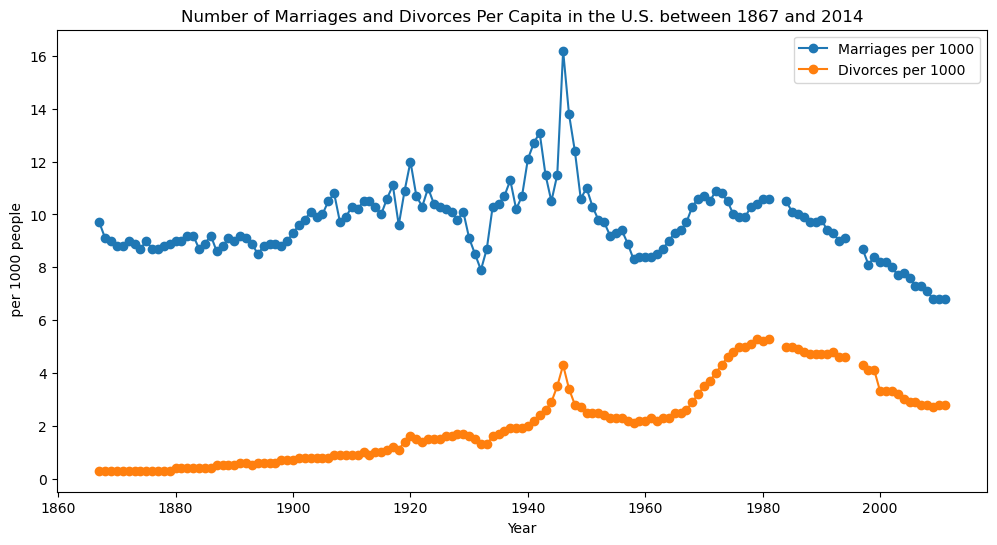

In [82]:
import pandas as pd
import matplotlib.pyplot as plt


file_path = '/Users/yaazhinimurugavel/Downloads/us-marriages-divorces-1867-2014.csv'
data = pd.read_csv(file_path)


plt.figure(figsize=(12, 6))

plt.plot(data['Year'], data['Marriages_per_1000'], label='Marriages per 1000', marker='o')
plt.plot(data['Year'], data['Divorces_per_1000'], label='Divorces per 1000', marker='o')


plt.title('Number of Marriages and Divorces Per Capita in the U.S. between 1867 and 2014')
plt.xlabel('Year')

plt.ylabel(' per 1000 people')
plt.legend()

plt.show()

In [0]:
Question 7

In [0]:
Create a vertical bar chart comparing the number of marriages and divorces percapita in the U.S. between 1900, 1950, and 2000.Dont forget to label your axes!

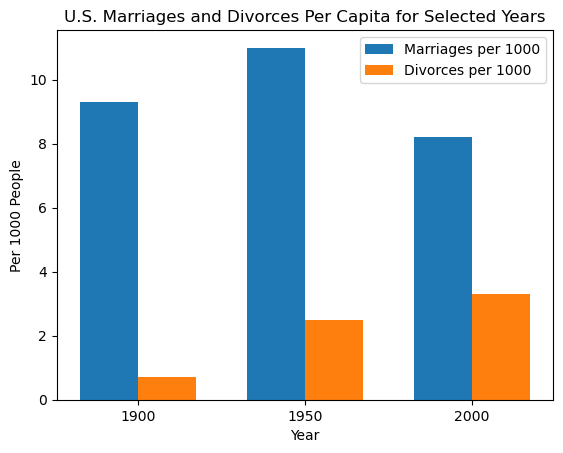

In [89]:
import matplotlib.pyplot as plt
import pandas as pd

data_path = '"C:\Users\rahul\Downloads\us-marriages-divorces-1867-2014.csv"'
stats = pd.read_csv(data_path)

target_years = [1900, 1950, 2000]
selected_stats = stats[stats['Year'].isin(target_years)][['Year', 'Marriages_per_1000', 'Divorces_per_1000']]

plot_figure, plot_axes = plt.subplots()
column_width = 0.35  # Bar width
year_indexes = range(len(target_years))

marriage_plot = plot_axes.bar(year_indexes, selected_stats['Marriages_per_1000'], column_width, label='Marriages per 1000')
divorce_plot = plot_axes.bar([index + column_width for index in year_indexes], selected_stats['Divorces_per_1000'], column_width, label='Divorces per 1000')

plot_axes.set_xlabel('Year')
plot_axes.set_ylabel('Per 1000 People')
plot_axes.set_title('U.S. Marriages and Divorces Per Capita for Selected Years')
plot_axes.set_xticks([index + column_width / 2 for index in year_indexes])
plot_axes.set_xticklabels(target_years)
plot_axes.legend()


plt.show()


In [0]:
QUESTION 8

In [0]:
Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sortthe actors by their kill count and label each bar with the corresponding actors name.Dont forget to label your axes!

In [90]:
hollywood_actor_kills = pd.read_csv('/Users/yaazhinimurugavel/Downloads/actor_kill_counts.csv')
hollywood_actor_kills

,Actor,Count
0,Arnold Schwarzenegger,369
1,Chow Yun-Fat,295
2,Clint Eastwood,207
3,Clive Owen,194
4,Dolph Lundgren,239
5,Jet Li,201
6,Nicolas Cage,204
7,Sylvester Stallone,267
8,Tomisaburo Wakayama,226
9,Wesley Snipes,193


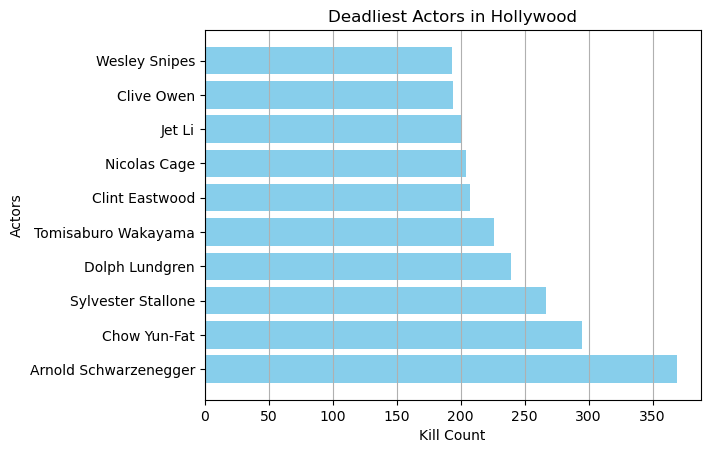

In [92]:
import matplotlib.pyplot as plt
import pandas as pd

hollywood_actor_kills = pd.read_csv('"C:\Users\rahul\Downloads\actor_kill_counts.csv"')
actor_names = hollywood_actor_kills['Actor'].values
kill_counts = hollywood_actor_kills['Count'].values

sorted_indices = sorted(range(len(kill_counts)), key=lambda k: kill_counts[k], reverse=True)
sorted_actors = [actor_names[i] for i in sorted_indices]
sorted_kill_counts = [kill_counts[i] for i in sorted_indices]

plt.barh(sorted_actors, sorted_kill_counts, color='skyblue')
plt.xlabel('Kill Count')
plt.ylabel('Actors')
plt.title('Deadliest Actors in Hollywood')
plt.grid(axis='x')

# Display the plot
plt.show()

In [0]:
QUESTION 9

In [0]:
Create a pie chart showing the fraction of all Roman Emperors that wereassassinated.Make sure that the pie chart is an even circle, labels the categories, and shows the percentage breakdown of the categories.

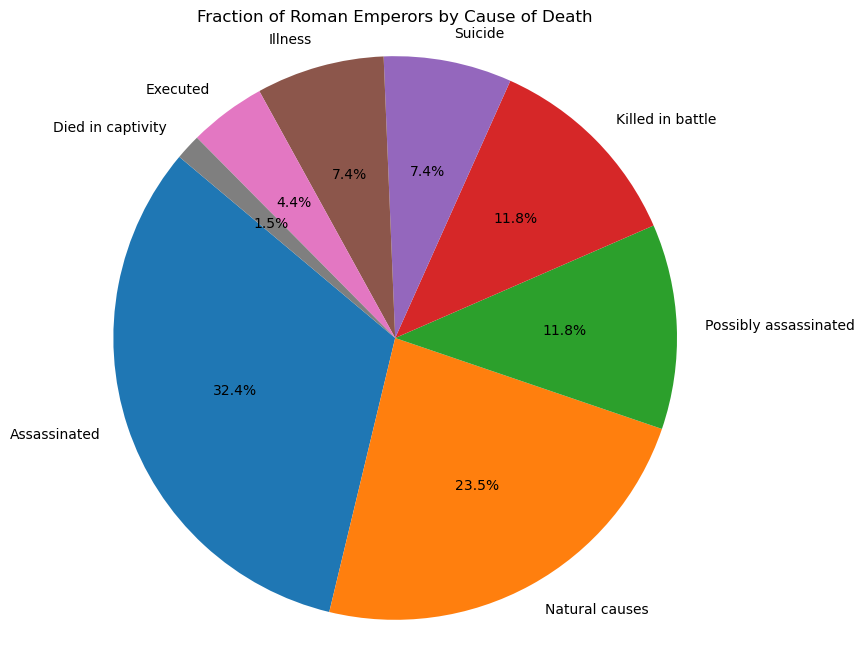

In [96]:
import pandas as pd
import matplotlib.pyplot as plt


file_path = '"C:\Users\rahul\Downloads\roman-emperor-reigns.csv"'
data = pd.read_csv(file_path)


death_counts = data['Cause_of_Death'].value_counts()


plt.figure(figsize=(8, 8))
plt.pie(death_counts, labels=death_counts.index, autopct='%1.1f%%', startangle=140)


plt.title('Fraction of Roman Emperors by Cause of Death')
plt.axis('equal')  


plt.show()


In [0]:
QUESTION 10

In [0]:
Create a scatter plot showing the relationship between the total revenue earned byarcades and the number of Computer Science PhDs awarded in the U.S. between2000 and 2009.Dont forget to label your axes!Color each dot according to its year.

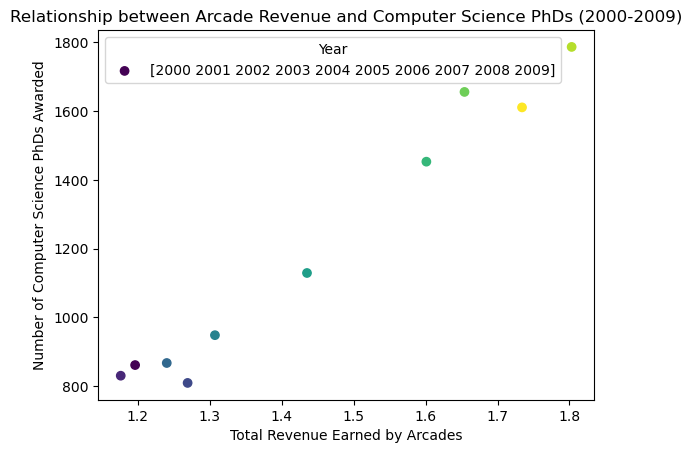

In [97]:
import matplotlib.pyplot as plt
import numpy as np

arcade_revenue_cs_doctorates = pd.read_csv('"C:\Users\rahul\Downloads\arcade-revenue-vs-cs-doctorates.csv"')
arcade_revenue = arcade_revenue_cs_doctorates['Total Arcade Revenue (billions)'].values
cs_doctorates_awarded = arcade_revenue_cs_doctorates[
    'Computer Science Doctorates Awarded (US)'].values
years = np.arange(2000, 2010)

colors = plt.cm.viridis(np.linspace(0, 1, len(years)))

plt.scatter(arcade_revenue, cs_doctorates_awarded, c=colors, label=years)
plt.xlabel('Total Revenue Earned by Arcades')
plt.ylabel('Number of Computer Science PhDs Awarded')
plt.title('Relationship between Arcade Revenue and Computer Science PhDs (2000-2009)')
plt.legend(title='Year')

# Show the plot
plt.show()